In [37]:
%matplotlib inline
from IPython.display import HTML,Image,SVG,YouTubeVideo


In [38]:
from skimage import data
import numpy as np
from skimage.morphology import disk
import skimage.filters.rank as skr
from skimage.measure import label
from skimage.morphology import watershed
from skimage.io import imread
from scipy import ndimage as ndi
import matplotlib.pyplot as plt
from skimage.segmentation import mark_boundaries

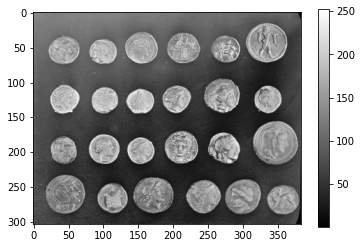

In [39]:
# segment the coins
im = data.coins()
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

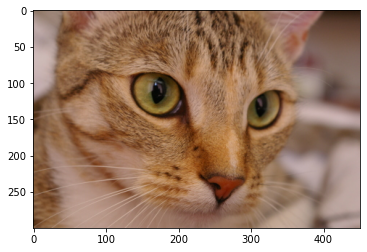

In [4]:
# detect the eyes / nose
im = data.chelsea()
plt.imshow(im);


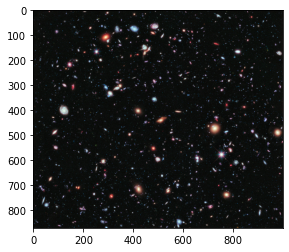

In [5]:
# counting the galaxies
im = data.hubble_deep_field()
plt.imshow(im);

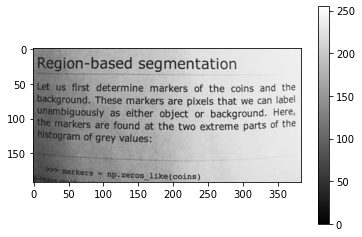

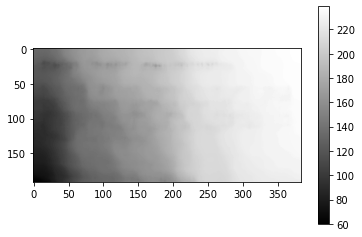

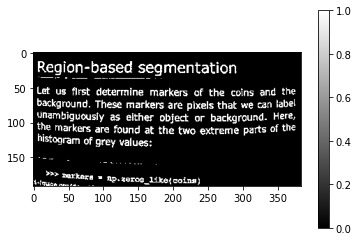

In [6]:
im = data.page()

bg = skr.median(im, disk(10))

res = (1.*im/bg) < .8

plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();
plt.figure()
plt.imshow(bg,cmap=plt.cm.gray);
plt.colorbar()
plt.figure()
plt.imshow(res.astype(np.uint8),cmap=plt.cm.gray);
plt.colorbar();


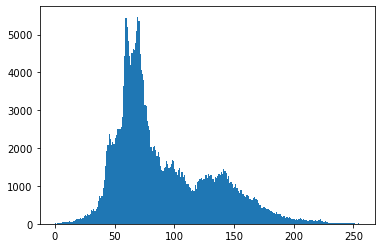

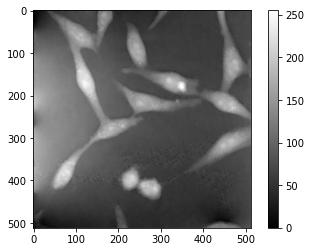

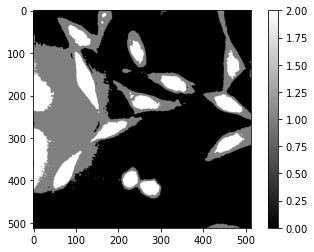

In [57]:
# segment the cells
im = imread('../data/dh_phase.png')
th = im>150
th1 = im>100

# Optonnal : plot the histogram
plt.hist(im.flatten(), bins=range(256))
plt.figure()
##


plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();
plt.figure()
plt.imshow(1.*th+th1,cmap=plt.cm.gray)
plt.colorbar();


We have segmented this image using a simple treshold.
- We apply treshold, 
    - Attention : we do it here manually, this is surely not the best method, there must be some method to do it automatically
- We count the result
## Interactivity (oral course) : how to segment such an image ?
- We could use otsu, possibly, but we would need two of them (see image)
- Border segmentation ? this is Sobel : 

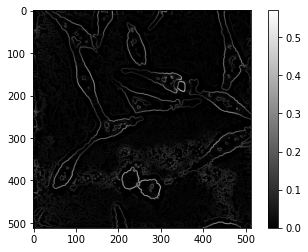

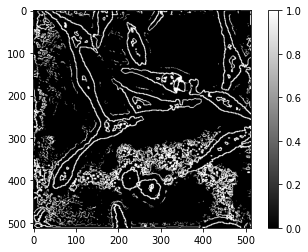

In [61]:
# segment the cells
im = imread('../data/dh_phase.png')
from skimage import filters
import skimage.filters.rank as skt

#so = filters.sobel(im)

# Other method. First, edge enhancement
# edge enhancement, with gradient
eh = skt.enhance_contrast(im, disk(10))
so = filters.sobel(eh)

th = so > .04

plt.imshow(so,cmap=plt.cm.gray)
plt.colorbar();
plt.figure();

plt.imshow(th,cmap=plt.cm.gray)
plt.colorbar();


## Conclusion
- this is not a very good method
- By diminuing the treshold, we have more pixels, but we merge object
- Even with edge enhancement, it doesn't work very properly
- NB : high pass filter is similar to edge detection
- Illumination, the intensity, could be enough !! Parts we want to get are more illuminated.

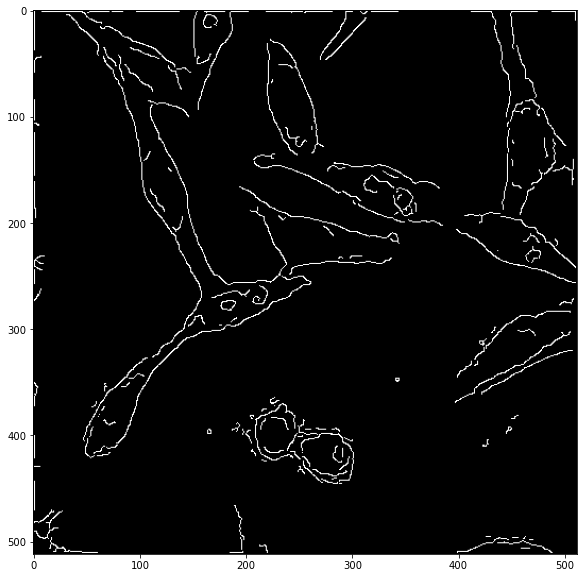

In [62]:
from skimage.feature import canny


ca = canny(im)

plt.figure(figsize=[10,10])
plt.imshow(ca,cmap=plt.cm.gray);

## Equalization, then segmentation
- It doesn't work a lot

## Region segmentation
- this is a very efficient method, this is basically what we want
- pixels in the background that could be attached to relevant objects of the image
- We will see that **later**

/home/sami/anaconda3/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


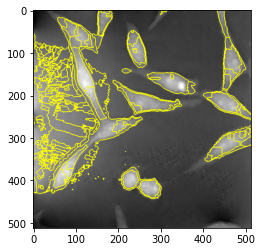

In [63]:
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries
lab,n_lab = label(th,return_num=True)
bg = th1==0
lab[bg] = n_lab+1

#med = skr.median(im,disk(5))
#gr = skr.gradient(med,disk(3))

ws = watershed(255-im,lab)
plt.imshow(mark_boundaries(im,ws))


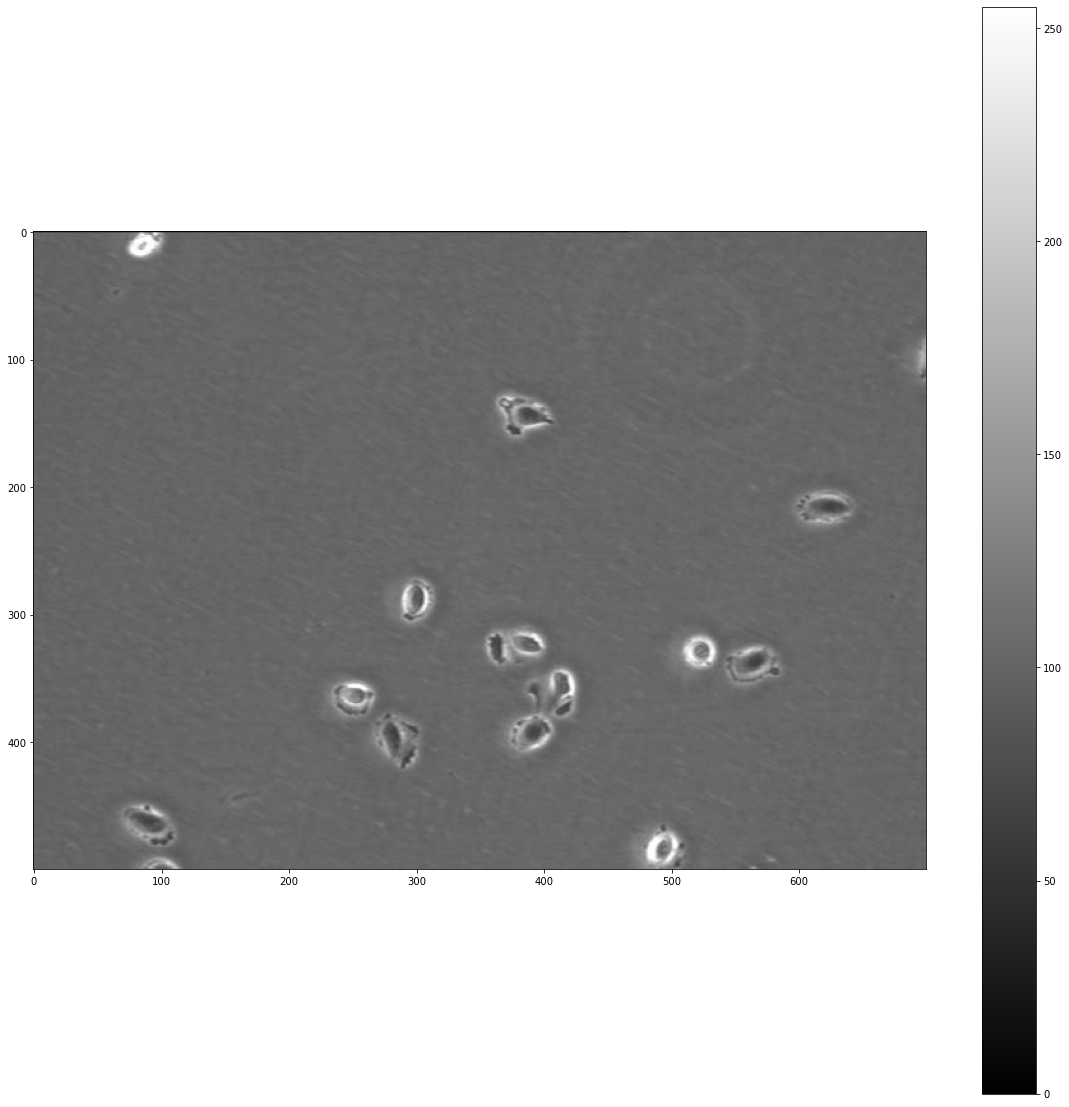

In [64]:
im = imread('../data/exp0001.jpg')
plt.figure(figsize=[20,20])
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

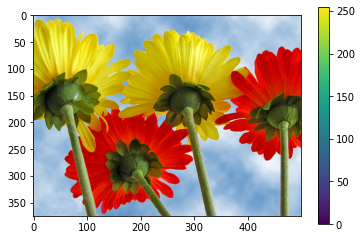

In [65]:
# count red and yellow flowers
im = imread('../data/flowers.jpg')
plt.imshow(im)
plt.colorbar();

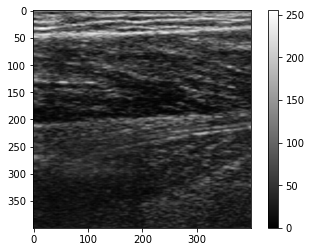

In [66]:
# find the fiber orientation
im = imread('../data/image4.png')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

In [13]:
from IPython.display import YouTubeVideo
YouTubeVideo('PUcz11MLxUk', start=0, autoplay=1, theme="light", color="blue",)

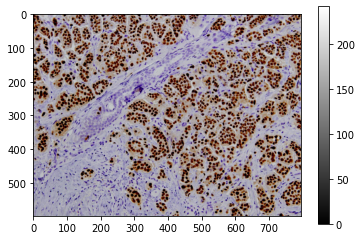

In [70]:
# detect stroma
im = imread('../data/Rp042826d.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

## Interactive
- Colors ! we can easily separate the two regions

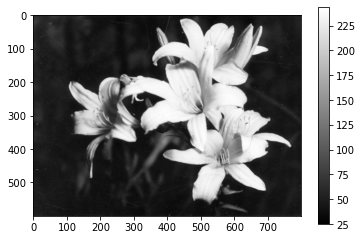

In [15]:
# segment the flowers
im = imread('../data/KaneFlowers.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

/home/sami/anaconda3/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


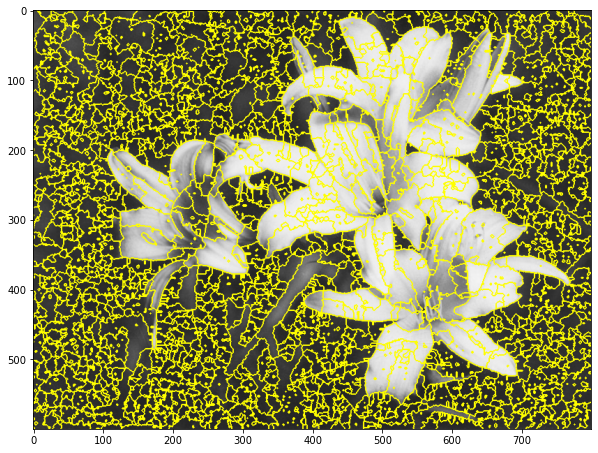

In [16]:
from skimage.morphology import watershed
from skimage.segmentation import mark_boundaries

gr = skr.gradient(im,disk(3))

local_min = im <= skr.minimum(im,disk(5))

lab = label(local_min)

#med = skr.median(im,disk(5))

ws = watershed(gr,lab)

plt.figure(figsize=[10,10])
plt.imshow(mark_boundaries(im,ws))

#plt.imshow(local_min)


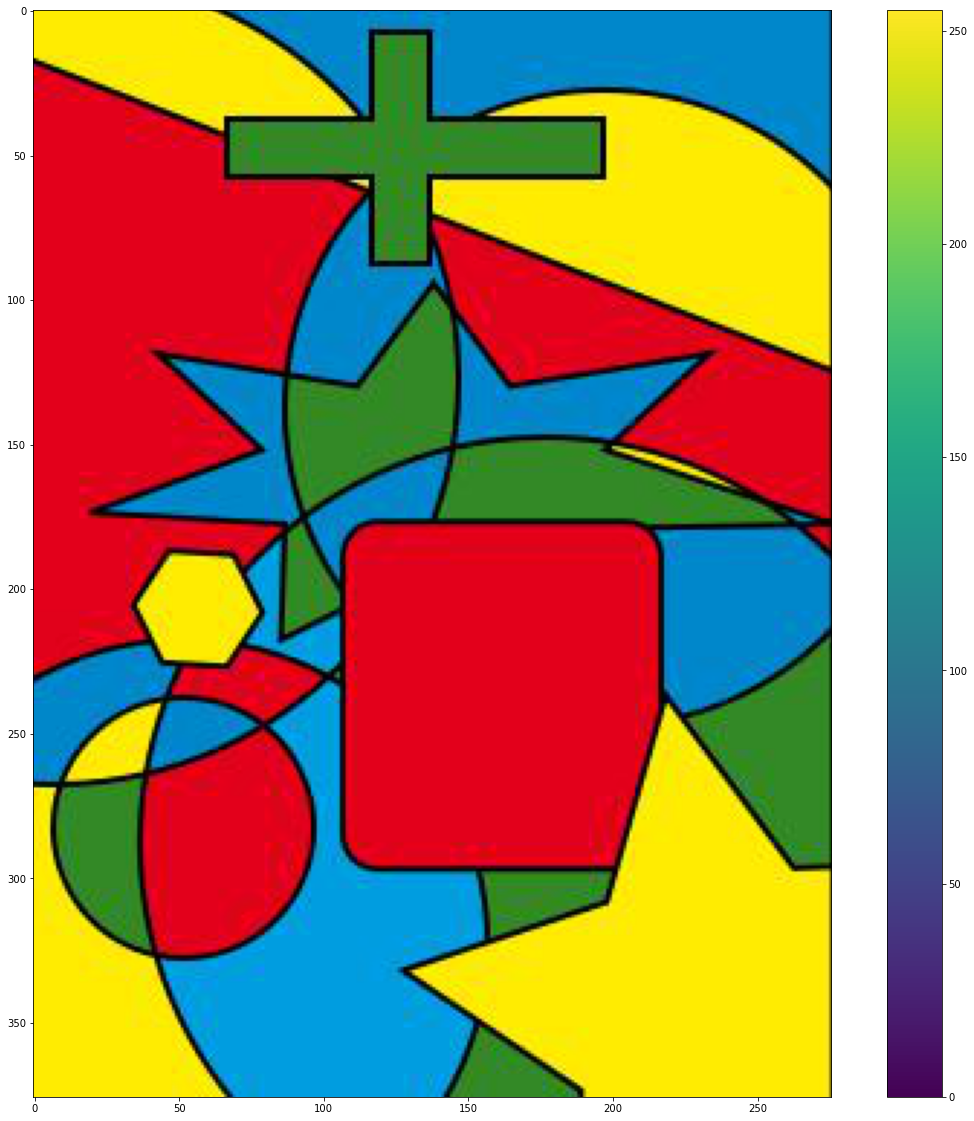

In [17]:
rgb = imread('../data/4colors.JPG')

plt.figure(figsize=[20,20])
plt.imshow(rgb)
plt.colorbar();

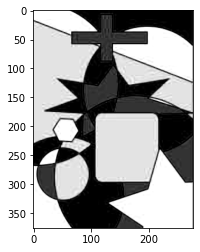

In [18]:
r = skr.median(rgb[:,:,0],disk(1))
plt.imshow(r,cmap=plt.cm.gray)

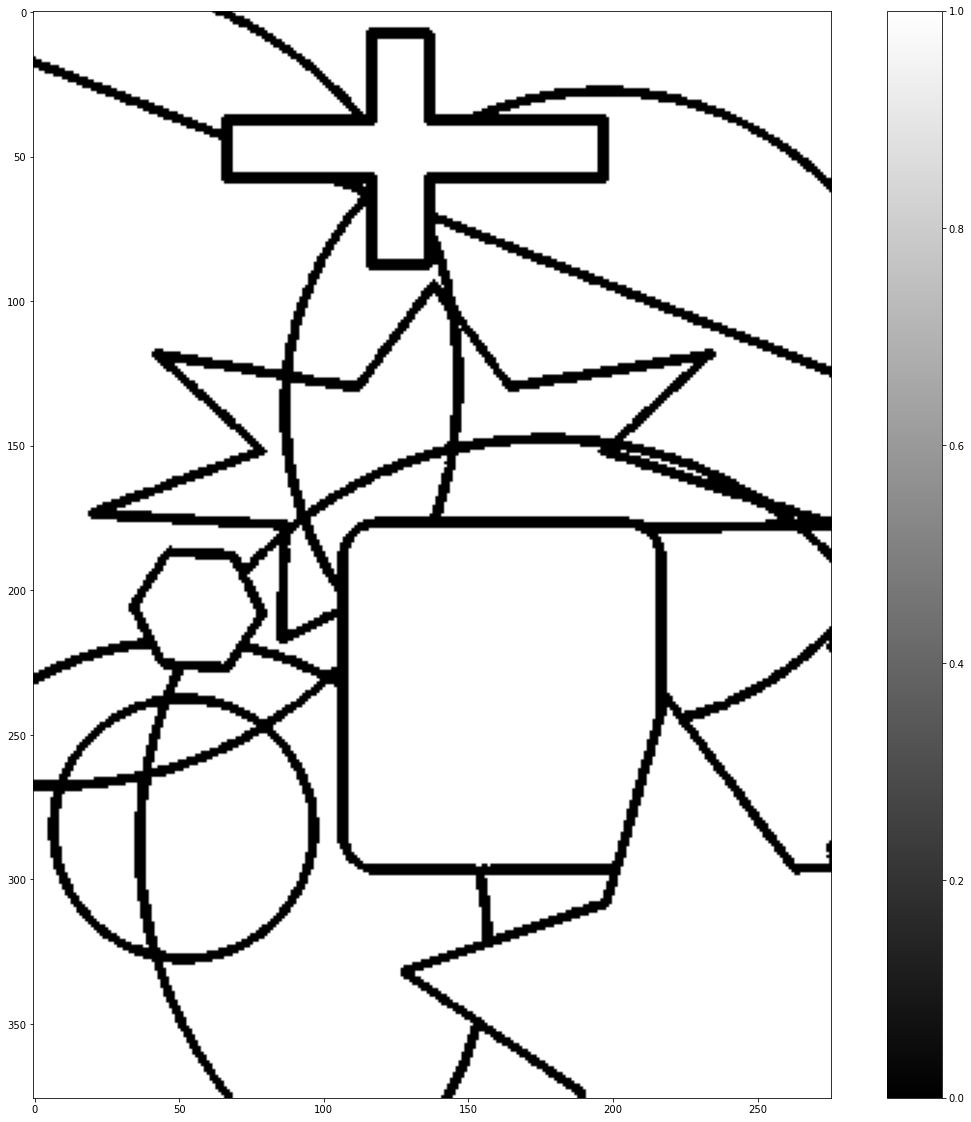

In [19]:
s = rgb.sum(axis=2)
th = s > 100

#post-processing
pth = skr.minimum(th.astype(np.uint8),disk(1))

plt.figure(figsize=[20,20])
plt.imshow(pth,cmap=plt.cm.gray)
plt.colorbar()

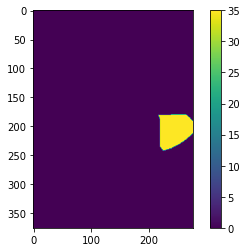

In [20]:
lab = label(pth)

lut = np.arange(0,np.max(lab)+1)

plt.imshow(lab)
plt.colorbar()

mask = lab == 20
plt.imshow(mask)

In [21]:
from random import shuffle
shuffle(lut)

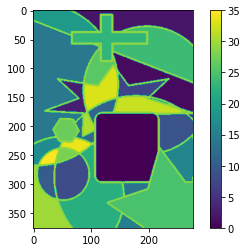

In [22]:
shuffle(lut)
plt.imshow(lut[lab])
plt.colorbar()

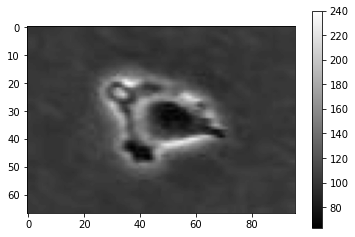

In [23]:
# segment the cell
im = imread('../data/exp0001crop.jpg')
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

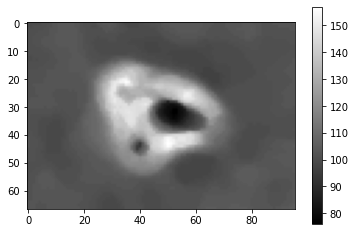

In [24]:
m = skr.median(im,disk(5))
plt.imshow(m,cmap=plt.cm.gray)
plt.colorbar()

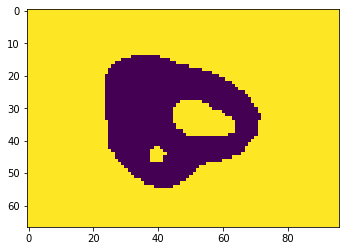

In [25]:
th1 = m < 90

th2 = np.bitwise_and(110 > m,m < 130)

plt.imshow(th2)

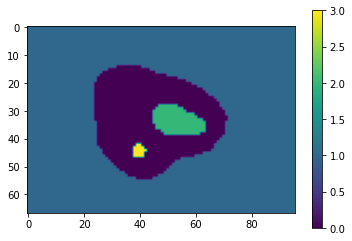

In [26]:
markers = label(th2)
plt.imshow(markers)
plt.colorbar()

In [27]:
markers[markers==3] = 2
ws = watershed(im,markers)

/home/sami/anaconda3/lib/python3.8/site-packages/skimage/morphology/_deprecated.py:5: skimage_deprecation: Function ``watershed`` is deprecated and will be removed in version 0.19. Use ``skimage.segmentation.watershed`` instead.
  def watershed(image, markers=None, connectivity=1, offset=None, mask=None,


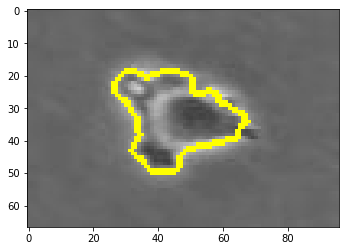

In [28]:
plt.imshow(ws)
plt.imshow(mark_boundaries(im,ws))

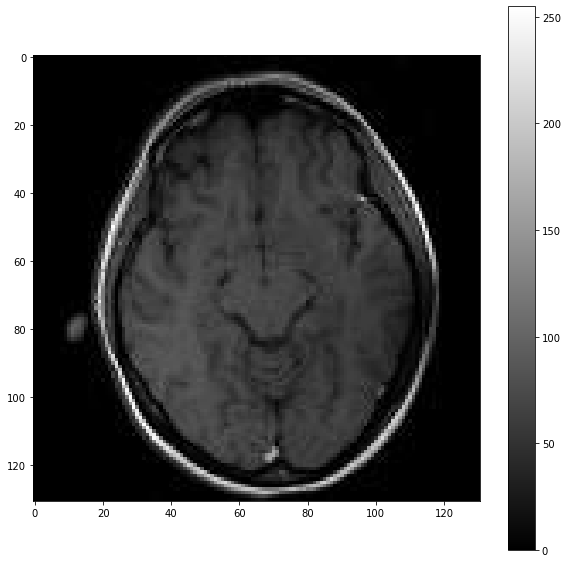

In [29]:
# segment the cell
im = imread('../data/brain.jpg')[:,:,0]
plt.figure(figsize=(10,10))
plt.imshow(im,cmap=plt.cm.gray)
plt.colorbar();

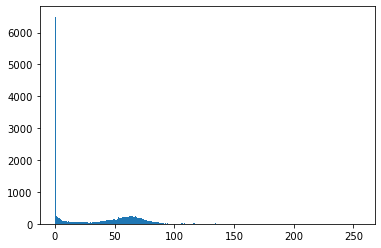

In [30]:
plt.hist(im.flatten(),255);

In [31]:
from skimage.filters import threshold_otsu

t_otsu = threshold_otsu(im)
t_otsu

36

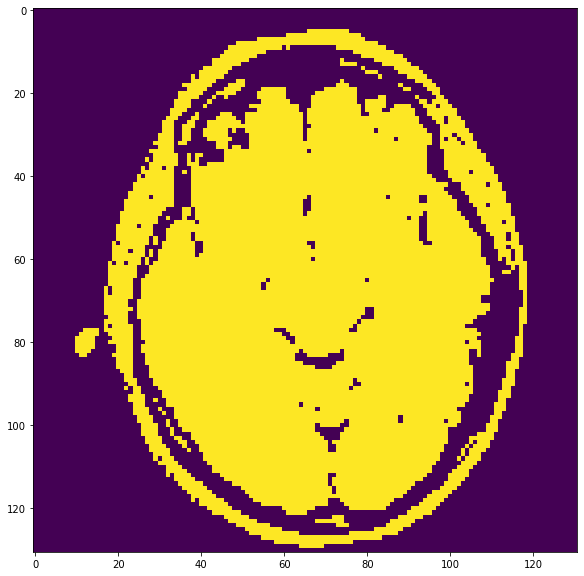

In [32]:
th = im > t_otsu
plt.figure(figsize=(10,10))
plt.imshow(th)

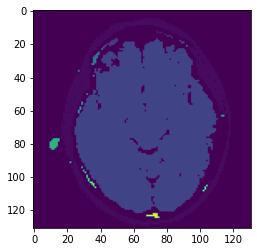

In [33]:
lab = label(th,connectivity=1)
plt.imshow(lab)

In [34]:
from skimage.measure import regionprops

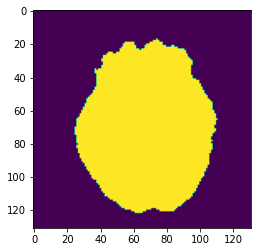

In [35]:
props = regionprops(lab)

brain = (lab==7).astype(np.uint8)

pp = skr.maximum(brain,disk(3))
pp = skr.minimum(pp,disk(3))

plt.imshow(pp)

In [36]:
for p in props:
    print(p.area, p.label)

1459 1
5 2
1 3
3 4
1 5
16 6
6323 7
1 8
2 9
1 10
1 11
1 12
1 13
16 14
1 15
1 16
1 17
2 18
2 19
2 20
2 21
30 22
1 23
1 24
1 25
1 26
2 27
2 28
5 29
1 30
1 31
2 32
1 33
13 34
